# Explore genrating captch with Python module `captcha`

- Generate captcha
- Save captcha
- Create captcha in batch mode

In [14]:
from captcha.image import ImageCaptcha
import matplotlib.pyplot as plt
import random
import string

## 1. Generate captcha

In [41]:
width, height = 120, 60
n_len = 4

# characters: digits, upper, lower alphabet
characters = string.digits + string.ascii_uppercase + string.ascii_lowercase

# create captcha with four random characters
labels = ''.join([random.choice(characters) for j in range(4)])

# captcha generator
generator = ImageCaptcha(width=width,height=height)
image = generator.generate_image(labels)

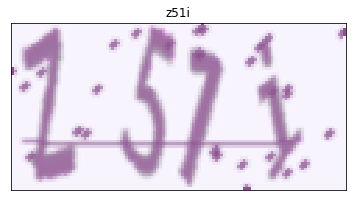

In [42]:
# show images
plt.imshow(image)
plt.title(labels)
plt.xticks([])
plt.yticks([])
plt.show()

## 2. Save captcha

In [43]:
# write to file
lower_labels = [c.lower() for c in labels]
filename = f'{"".join(lower_labels)}.jpg'
image.save(filename)

## 3. Create Captcha in Batch Mode

In [49]:
import os
def generate_captcha_samples(image_dir, # storing folder
                             num=1000,  # count of captcha
                             label=1): # 1-digits, 2-lower case alphabet, 4-upper case alphabet
    '''create captcha image file with labels as name'''
    # random captcha labels
    # combination of single label mode, 
    # e.g. 3=1+2, both digits and lower case alphabet are allowed
    modes = [0b1, 0b10, 0b100]
    sources = [string.digits, string.ascii_lowercase, string.ascii_uppercase]
    if label<1: label = 1
    if label>7: label = 7
    characters = ''
    for mode, source in zip(modes, sources):
        if label & mode: characters += source
            
    # create captcha with four random characters
    generator = ImageCaptcha(width=width,height=height)
    for i in range(num):
        labels = ''.join([random.choice(characters) for j in range(4)])
        image = generator.generate_image(labels)
        # write file
        lower_labels = [c.lower() for c in labels]
        filename = f'{"".join(lower_labels)}.jpg'
        image.save(os.path.join(image_dir, filename))

In [59]:
generate_captcha_samples('samples/captcha', 100000, 6) # lower + upper